### Prediction of Wine quality using regression and classification

#### Problem defining

#### Data collecting

In [1]:
## import các thư viện cần thiết
import os  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error

In [2]:
df=pd.read_csv("winequalityN.csv")
df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


#### Data analyzing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
## Số lượng missing values của từng cột 
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

##### Xử lí missing data

##### Data exploratory

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


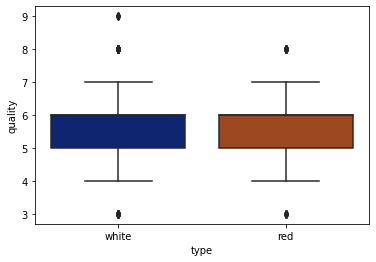

In [6]:
sns.boxplot(x="type",y="quality",data=df, palette="dark")
plt.show()

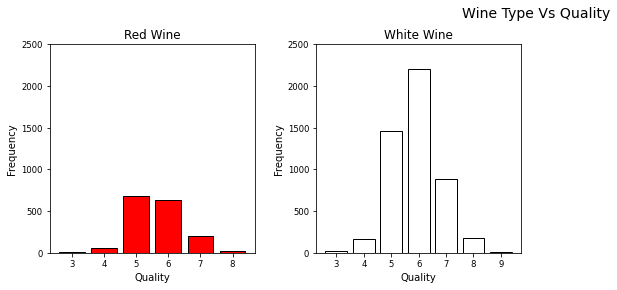

In [7]:
fig = plt.figure(figsize = (18, 4))
title = fig.suptitle("Wine Type Vs Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,4, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = df.quality[df.type == 'red'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', edgecolor='black', linewidth=1)


ax2 = fig.add_subplot(1,4, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = df.quality[df.type == 'white'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white', edgecolor='black', linewidth=1)


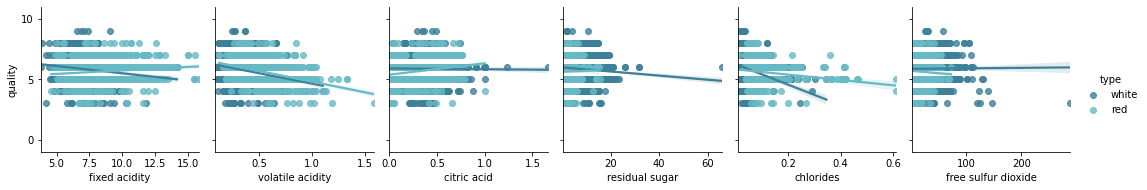

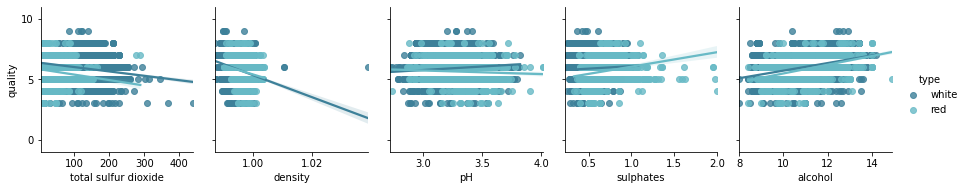

In [8]:
g = sns.PairGrid(df, y_vars=["quality"], x_vars=list(df)[1:-6],palette="GnBu_d",hue="type")
g.map(sns.regplot)
g.set(ylim=(-1, 11), yticks=[0, 5, 10]);
g.add_legend()
plt.show()

a = sns.PairGrid(df, y_vars=["quality"], x_vars=list(df)[-6:-1],palette="GnBu_d",hue="type")
a.map(sns.regplot)
a.set(ylim=(-1, 11), yticks=[0, 5, 10]);
a.add_legend()
plt.show()

### Feature Engineering

In [9]:
## Hàm xử lí missing value
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """
        Impute missing values:
        - Columns of dtype object are imputed with the most frequent value in column.
        - Columns of other types are imputed with mean of column.
        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
cols = df.columns
cols = list(cols.drop(['type','quality']))
y=df["quality"]
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, cols], y, test_size=0.33, random_state=42)

### Modeling and evaluating for regression:

In [80]:
from sklearn.linear_model import LinearRegression

In [88]:
LR = Pipeline([
        ('imputer', DataFrameImputer()),
        ('scl', StandardScaler()),
        ('lr',  LinearRegression())
 ])  

LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

In [89]:
x = LR.predict(X_train)

In [90]:
print("Train rmse: " + str(mean_squared_error(y_train, x)**0.5))
print("Test rmse: " + str(mean_squared_error(y_test, y_pred)**0.5))

Train rmse: 0.7384963692135237
Test rmse: 0.71969216047923


In [91]:
# so với scale 0-10, thì RMSE ở đây khá nhỏ
#RMSE của test nhỏ hơn train ~> khả năng không bị overfit

#### Classification với 10 classes

In [92]:
from sklearn.neighbors import KNeighborsClassifier
KNN = Pipeline([
        ('imputer', DataFrameImputer()),
        ('scl', StandardScaler()),
        ('clf',  KNeighborsClassifier())
 ])  

KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)

In [94]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.26      0.15      0.19        47
           5       0.58      0.68      0.62       412
           6       0.59      0.57      0.58       594
           7       0.51      0.48      0.49       208
           8       0.12      0.09      0.11        33

    accuracy                           0.56      1300
   macro avg       0.34      0.33      0.33      1300
weighted avg       0.55      0.56      0.55      1300

[[  0   0   3   2   1   0]
 [  0   7  22  17   1   0]
 [  1   9 279 111   8   4]
 [  0  11 162 337  70  14]
 [  0   0  17  88 100   3]
 [  0   0   0  13  17   3]]


In [95]:
# ~> classification với 10 classes cho ra điểm khá thấp

#### Classification với 3 classes

In [ ]:
df['quality_label'] = df.quality.apply(lambda q: 'bad' if q <= 5 else 'good' if q <= 7 else 'excellent')

In [ ]:
ax3 = fig.add_subplot(1,4, 3)
ax3.set_title("Red Wine")
ax3.set_xlabel("Quality Class")
ax3.set_ylabel("Frequency") 
rw_q = df.quality_label[df.type == 'red'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax3.set_ylim([0, 3200])
bar3 = ax3.bar(list(range(len(rw_q[0]))), rw_q[1], color='red', edgecolor='black', linewidth=1, tick_label =rw_q[0])

ax4 = fig.add_subplot(1,4, 4)
ax4.set_title("White Wine")
ax4.set_xlabel("Quality Class")
ax4.set_ylabel("Frequency") 
ww_q = df.quality_label[df.type == 'white'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax4.set_ylim([0, 3200])
bar4 = ax4.bar(list(range(len(ww_q[0]))), ww_q[1], color='white', edgecolor='black', linewidth=1, tick_label =ww_q[0])

In [96]:
cols = df.columns
cols = list(cols.drop(['type', 'quality_label','quality']))
y=df["quality_label"]
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, cols], y, test_size=0.33, random_state=42)

In [97]:
from sklearn.ensemble import RandomForestClassifier
RF = Pipeline([
        ('imputer', DataFrameImputer()),
        ('scl', StandardScaler()),
        ('clf',  RandomForestClassifier())
 ])  

RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bad       0.79      0.75      0.77       465
   excellent       0.67      0.24      0.36        33
        good       0.84      0.88      0.86       802

    accuracy                           0.82      1300
   macro avg       0.77      0.63      0.66      1300
weighted avg       0.82      0.82      0.82      1300

